In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [48]:
grade=pd.read_csv('Grades.csv')

In [49]:
grade

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [50]:
grade.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [51]:
grade.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


# Preprocessing

In [52]:
grade['PH-121'].value_counts()

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

In [53]:
grade['CY-105'].value_counts()

A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

In [54]:
grade.keys()

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [55]:
# converting dataframe into only numerical data
grade.replace({'A':0,'A-':1,'B+':2,'B-':3,'D':4,'A+':5,'C':6,'C+':7,'C-':8,'D+':9,'WU':10,'F':11,'B':12,'W':13},inplace=True)

In [56]:
grade

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,3,9,8.0,6.0,8.0,9,4.0,8.0,3.0,...,8.0,8.0,8.0,8.0,1.0,0.0,8.0,12.0,1.0,2.205
1,CS-97002,0,4,9.0,4.0,3.0,6,4.0,0.0,9.0,...,9.0,4.0,6.0,4.0,1.0,3.0,6.0,6.0,12.0,2.008
2,CS-97003,0,12,0.0,3.0,2.0,0,3.0,2.0,1.0,...,12.0,12.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,3.608
3,CS-97004,4,7,9.0,4.0,4.0,1,9.0,8.0,4.0,...,9.0,6.0,9.0,8.0,3.0,12.0,7.0,7.0,7.0,1.906
4,CS-97005,1,1,1.0,2.0,0.0,0,1.0,2.0,0.0,...,3.0,2.0,2.0,3.0,1.0,0.0,1.0,1.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,12,0,0.0,1.0,5.0,0,1.0,1.0,5.0,...,1.0,1.0,0.0,0.0,0.0,2.0,2.0,12.0,0.0,3.798
567,CS-97568,5,0,0.0,0.0,0.0,0,0.0,1.0,0.0,...,2.0,2.0,0.0,0.0,1.0,12.0,1.0,6.0,1.0,3.772
568,CS-97569,12,0,1.0,2.0,0.0,0,0.0,0.0,0.0,...,1.0,12.0,0.0,2.0,0.0,6.0,2.0,1.0,1.0,3.470
569,CS-97570,0,2,4.0,0.0,4.0,9,3.0,8.0,3.0,...,4.0,12.0,12.0,8.0,4.0,6.0,12.0,3.0,6.0,2.193


In [57]:
#drop unnecessary column
grade=grade.drop(columns='Seat No.',axis=1)

In [58]:
grade

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,3,9,8.0,6.0,8.0,9,4.0,8.0,3.0,8.0,...,8.0,8.0,8.0,8.0,1.0,0.0,8.0,12.0,1.0,2.205
1,0,4,9.0,4.0,3.0,6,4.0,0.0,9.0,4.0,...,9.0,4.0,6.0,4.0,1.0,3.0,6.0,6.0,12.0,2.008
2,0,12,0.0,3.0,2.0,0,3.0,2.0,1.0,1.0,...,12.0,12.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,3.608
3,4,7,9.0,4.0,4.0,1,9.0,8.0,4.0,7.0,...,9.0,6.0,9.0,8.0,3.0,12.0,7.0,7.0,7.0,1.906
4,1,1,1.0,2.0,0.0,0,1.0,2.0,0.0,1.0,...,3.0,2.0,2.0,3.0,1.0,0.0,1.0,1.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,12,0,0.0,1.0,5.0,0,1.0,1.0,5.0,2.0,...,1.0,1.0,0.0,0.0,0.0,2.0,2.0,12.0,0.0,3.798
567,5,0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,...,2.0,2.0,0.0,0.0,1.0,12.0,1.0,6.0,1.0,3.772
568,12,0,1.0,2.0,0.0,0,0.0,0.0,0.0,12.0,...,1.0,12.0,0.0,2.0,0.0,6.0,2.0,1.0,1.0,3.470
569,0,2,4.0,0.0,4.0,9,3.0,8.0,3.0,8.0,...,4.0,12.0,12.0,8.0,4.0,6.0,12.0,3.0,6.0,2.193


In [59]:
#finding null value
grade.isna().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [60]:
#drop null value
grade1=grade.dropna()
print(grade1)

     PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         3       9     8.0        6.0     8.0       9     4.0     8.0   
1         0       4     9.0        4.0     3.0       6     4.0     0.0   
2         0      12     0.0        3.0     2.0       0     3.0     2.0   
3         4       7     9.0        4.0     4.0       1     9.0     8.0   
4         1       1     1.0        2.0     0.0       0     1.0     2.0   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566      12       0     0.0        1.0     5.0       0     1.0     1.0   
567       5       0     0.0        0.0     0.0       0     0.0     1.0   
568      12       0     1.0        2.0     0.0       0     0.0     0.0   
569       0       2     4.0        0.0     4.0       9     3.0     8.0   
570       6       4     4.0        6.0     6.0       9    12.0     7.0   

     EE-119  ME-107  ... CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0       3.0     8.0  ...    8.0     

In [61]:
grade1.isna().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [62]:
#finding duplicate value
grade1.duplicated().sum()

0

In [63]:
grade1.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,...,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,3.047962,4.997602,2.381295,4.143885,4.170264,2.414868,4.642686,4.103118,3.669065,4.134293,...,5.112710,5.227818,3.649880,5.899281,3.235012,3.023981,4.014388,5.052758,3.419664,2.990386
std,3.600561,3.646982,3.344188,3.742739,3.803121,3.256365,4.065497,3.875641,3.841302,3.691362,...,3.708651,3.792502,3.810058,3.534096,4.011692,3.833607,3.889061,3.875105,4.008872,0.578246
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.708000
25%,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.603000
50%,2.000000,4.000000,1.000000,3.000000,3.000000,1.000000,3.000000,3.000000,2.000000,3.000000,...,6.000000,6.000000,2.000000,6.000000,1.000000,1.000000,2.000000,4.000000,1.000000,3.033000
75%,5.000000,8.000000,3.000000,7.000000,7.000000,3.000000,8.000000,7.000000,6.000000,7.000000,...,8.000000,8.000000,7.000000,8.000000,5.000000,5.000000,7.000000,8.000000,6.000000,3.452000
max,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,13.000000,13.000000,12.000000,12.000000,12.000000,13.000000,3.985000


In [64]:
#finding correlation
grade1.corr()

C:\Users\saura\AppData\Local\Temp\ipykernel_30696\518318797.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  grade1.corr()


,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.110030,0.215885,0.158959,0.127728,0.227925,0.149299,0.101108,0.182775,0.137332,...,0.173133,0.298994,0.169271,0.098426,0.242692,0.088212,0.204752,0.171416,0.182794,-0.444037
HS-101,0.110030,1.000000,0.096653,0.220867,0.128975,0.031053,0.239244,0.103421,0.037693,0.120374,...,0.095816,0.133865,0.097856,0.009307,0.153005,0.122938,0.121014,0.178778,0.131768,-0.268559
CY-105,0.215885,0.096653,1.000000,0.210516,0.171982,0.227592,0.123202,0.169446,0.254796,0.126700,...,0.265937,0.130548,0.247651,0.127327,-0.026405,-0.137405,0.271831,0.166132,-0.037964,-0.444030
HS-105/12,0.158959,0.220867,0.210516,1.000000,0.133716,0.064912,0.144148,-0.003511,0.122534,0.083158,...,0.206646,0.101159,0.247128,0.057254,0.086758,-0.101098,0.154105,0.057817,-0.049534,-0.314481
MT-111,0.127728,0.128975,0.171982,0.133716,1.000000,0.092499,0.180561,0.194186,0.234231,0.138947,...,0.174522,0.171468,0.144472,0.256319,0.217164,0.005655,0.208517,0.212738,0.140042,-0.390323
CS-105,0.227925,0.031053,0.227592,0.064912,0.092499,1.000000,0.067513,0.022125,0.133994,0.114742,...,0.060411,0.147268,0.092723,0.089280,0.099430,0.074300,0.175675,0.094463,0.094538,-0.368400
CS-106,0.149299,0.239244,0.123202,0.144148,0.180561,0.067513,1.000000,0.133396,0.158959,0.174437,...,0.245812,0.112713,0.163388,0.141373,0.125431,0.069340,0.165742,0.087715,0.189016,-0.406537
EL-102,0.101108,0.103421,0.169446,-0.003511,0.194186,0.022125,0.133396,1.000000,0.135670,0.152101,...,0.094016,0.120402,0.080265,0.081843,0.092595,0.118912,0.121588,0.131205,0.192462,-0.343815
EE-119,0.182775,0.037693,0.254796,0.122534,0.234231,0.133994,0.158959,0.135670,1.000000,0.263367,...,0.178787,0.109967,0.174214,0.147165,0.092882,-0.013661,0.205158,0.190119,0.161395,-0.431834
ME-107,0.137332,0.120374,0.126700,0.083158,0.138947,0.114742,0.174437,0.152101,0.263367,1.000000,...,0.126722,0.205578,0.076333,0.123575,0.204344,0.016419,0.186233,0.061178,0.156188,-0.383767


# Data Visualization

# Correlation plot

C:\Users\saura\AppData\Local\Temp\ipykernel_30696\2144329334.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_hmap = grade1.corr()


<Figure size 2000x1800 with 0 Axes>

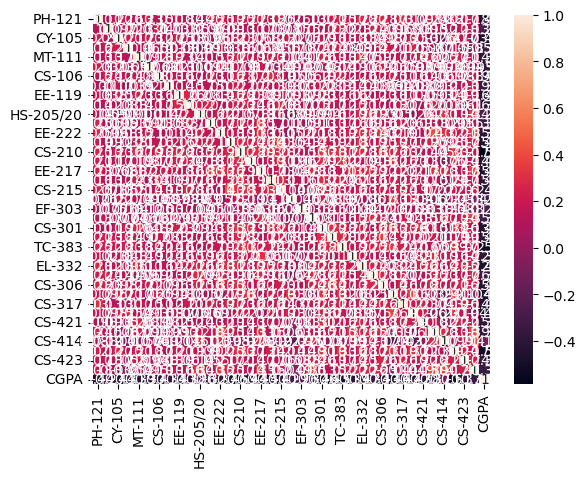

<Figure size 2000x1800 with 0 Axes>

In [103]:
corr_hmap = grade1.corr()
sns.heatmap(corr_hmap,annot=True)
plt.figure(figsize=(20,18))

# Joint plot

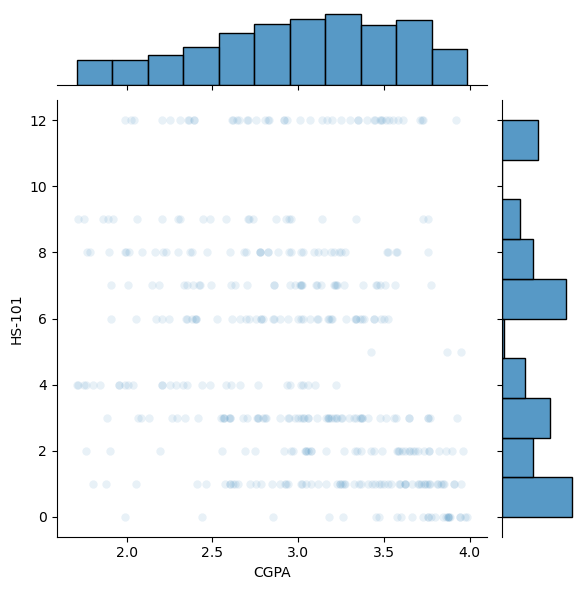

In [66]:
from scipy.stats import pearsonr
sns.jointplot(x='CGPA', y='HS-101', data=grade1, alpha = 0.1)

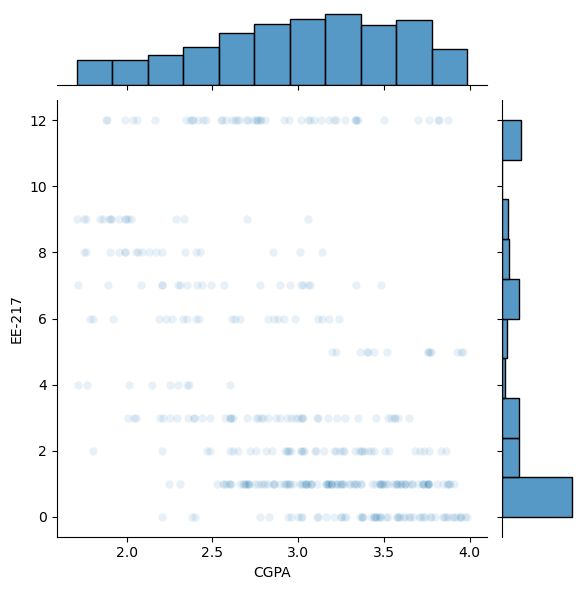

In [67]:
from scipy.stats import pearsonr
sns.jointplot(x='CGPA', y='EE-217', data=grade1, alpha = 0.1)

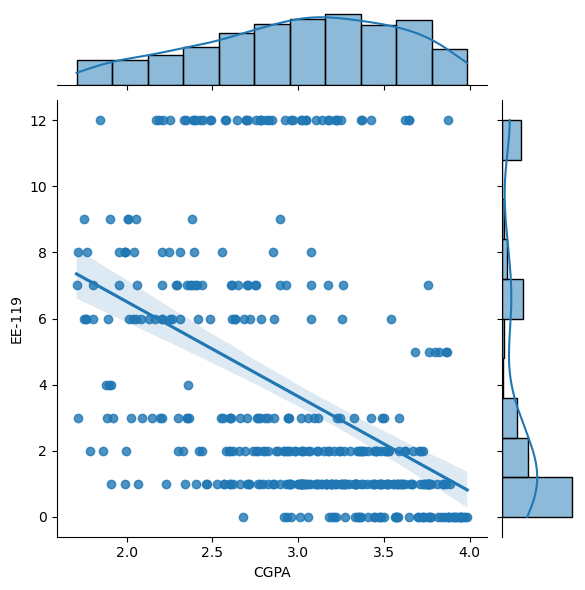

In [68]:
sns.jointplot(x='CGPA', y='EE-119', data=grade1, kind='reg')

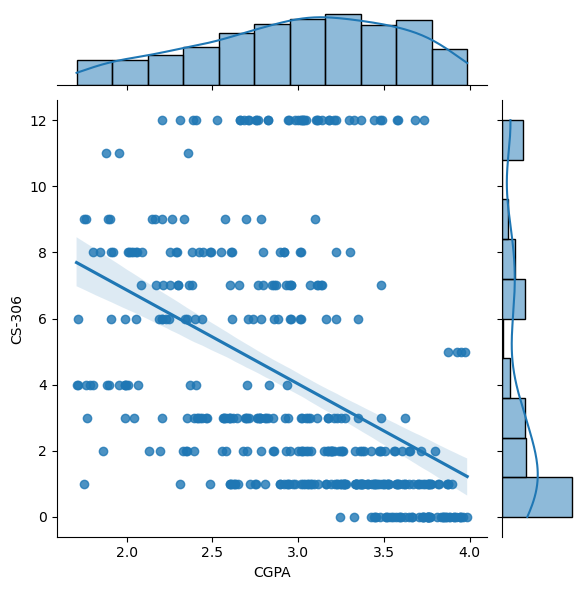

In [69]:
sns.jointplot(x='CGPA', y='CS-306', data=grade1, kind='reg')

# KDE Plot

<Axes: xlabel='CGPA', ylabel='Density'>

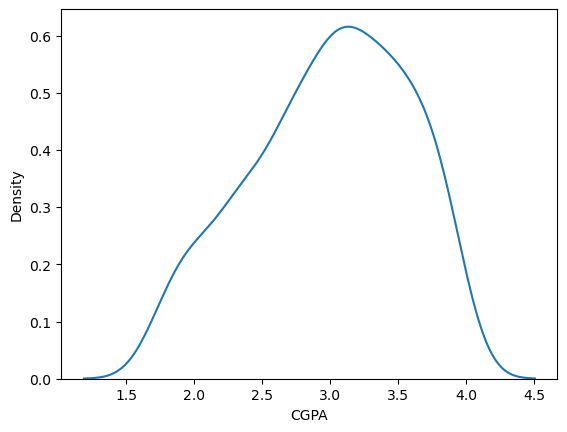

In [70]:
sns.kdeplot(data=grade1.CGPA)

# Dist Plot

C:\Users\saura\AppData\Local\Temp\ipykernel_30696\3497978333.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(grade1['CS-317'])


<Axes: xlabel='CS-317', ylabel='Density'>

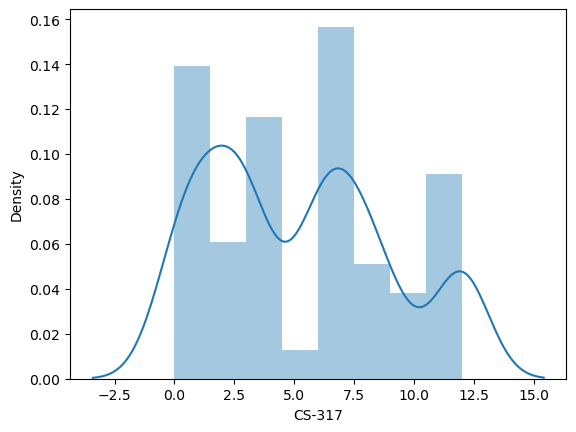

In [71]:
sns.distplot(grade1['CS-317'])

C:\Users\saura\AppData\Local\Temp\ipykernel_30696\3036443452.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(grade1['CGPA'])


<Axes: xlabel='CGPA', ylabel='Density'>

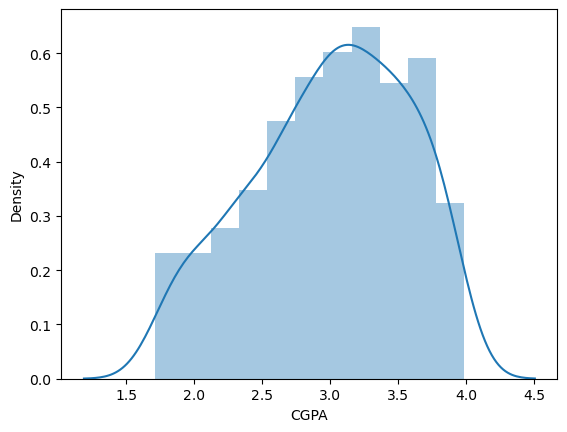

In [72]:
sns.distplot(grade1['CGPA'])

C:\Users\saura\AppData\Local\Temp\ipykernel_30696\1269310029.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(grade1['CS-306'])


<Axes: xlabel='CS-306', ylabel='Density'>

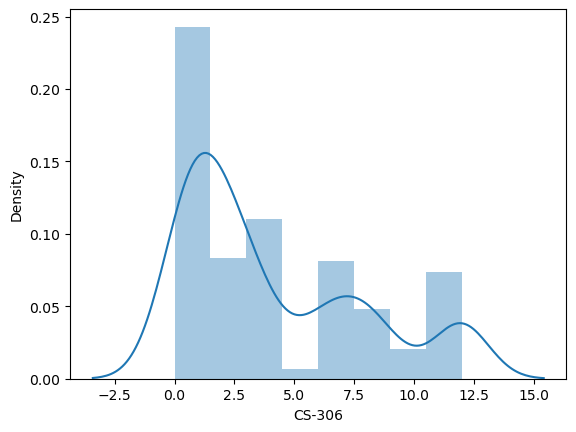

In [73]:
sns.distplot(grade1['CS-306'])

# Box Plot

PH-121          Axes(0.125,0.814746;0.065678x0.0652542)
HS-101       Axes(0.203814,0.814746;0.065678x0.0652542)
CY-105       Axes(0.282627,0.814746;0.065678x0.0652542)
HS-105/12    Axes(0.361441,0.814746;0.065678x0.0652542)
MT-111       Axes(0.440254,0.814746;0.065678x0.0652542)
CS-105       Axes(0.519068,0.814746;0.065678x0.0652542)
CS-106       Axes(0.597881,0.814746;0.065678x0.0652542)
EL-102       Axes(0.676695,0.814746;0.065678x0.0652542)
EE-119       Axes(0.755508,0.814746;0.065678x0.0652542)
ME-107       Axes(0.834322,0.814746;0.065678x0.0652542)
HS-205/20       Axes(0.125,0.736441;0.065678x0.0652542)
MT-222       Axes(0.203814,0.736441;0.065678x0.0652542)
EE-222       Axes(0.282627,0.736441;0.065678x0.0652542)
MT-224       Axes(0.361441,0.736441;0.065678x0.0652542)
CS-210       Axes(0.440254,0.736441;0.065678x0.0652542)
CS-211       Axes(0.519068,0.736441;0.065678x0.0652542)
EE-217       Axes(0.597881,0.736441;0.065678x0.0652542)
CS-212       Axes(0.676695,0.736441;0.065678x0.0

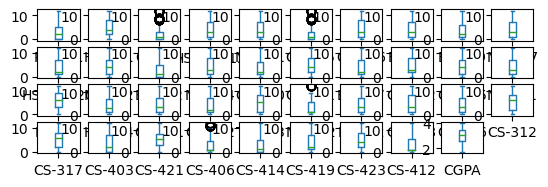

In [74]:
grade1.plot(kind='box',subplots=True,layout=(10,10))

# Histogram

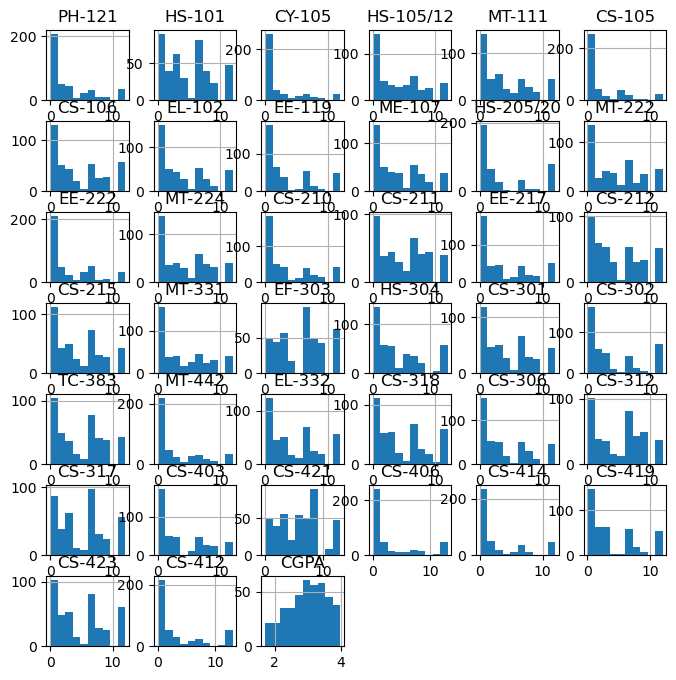

In [75]:
grade1.hist(figsize=(8,8),bins=10)
plt.show()

# Pair Plot

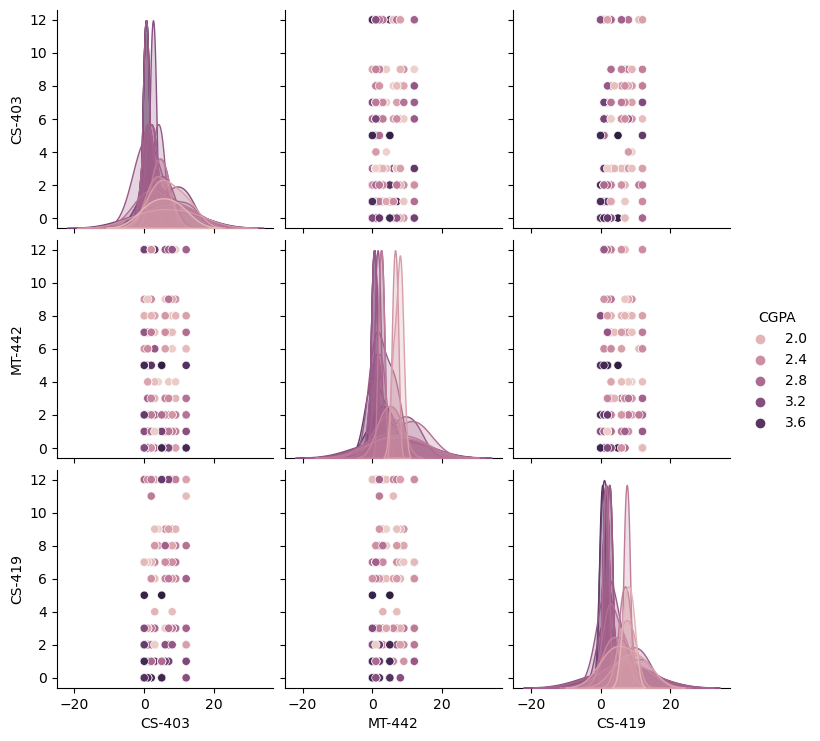

In [76]:
sns.pairplot(data=grade1,hue='CGPA',vars=['CS-403','MT-442','CS-419'])

# Scatter Plot

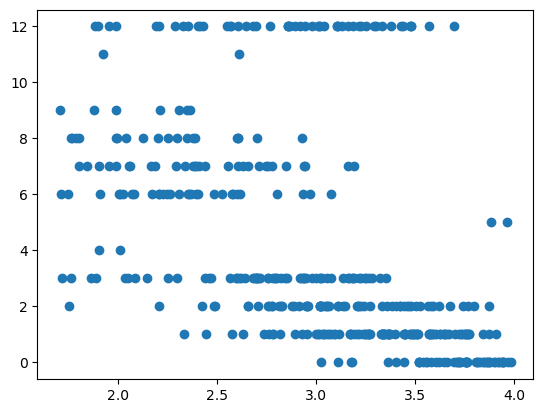

In [77]:
plt.scatter(grade1['CGPA'],grade1['CS-419'])
plt.show()

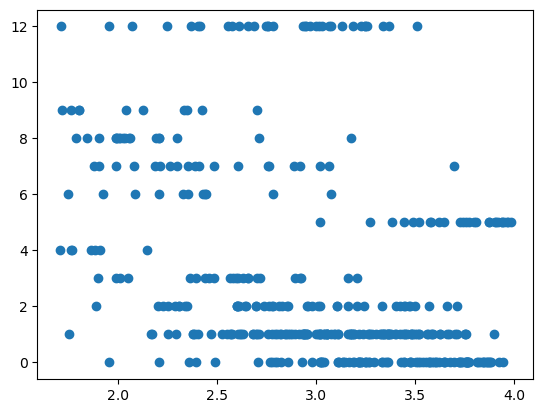

In [78]:
plt.scatter(grade1['CGPA'],grade1['MT-442'])
plt.show()

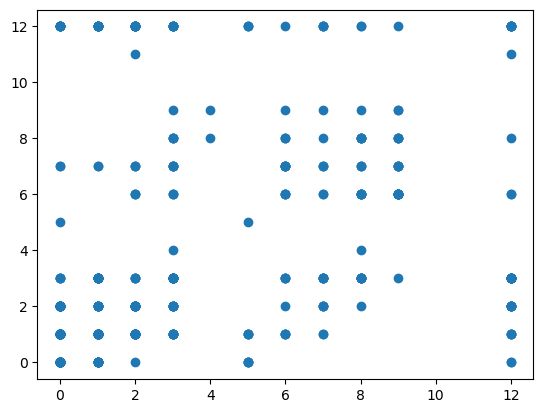

In [79]:
plt.scatter(grade1['CS-403'],grade1['CS-419'])
plt.show()

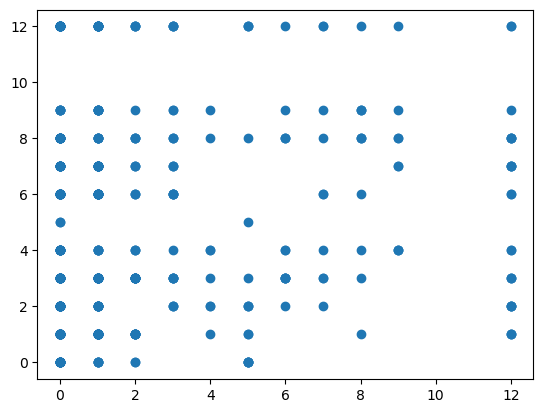

In [80]:
plt.scatter(grade1['CY-105'],grade1['HS-101'])
plt.show()

# Splitting the data

In [81]:
x=grade1.drop('CGPA',axis=1)
y=grade1['CGPA']

In [82]:
print(x)

     PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         3       9     8.0        6.0     8.0       9     4.0     8.0   
1         0       4     9.0        4.0     3.0       6     4.0     0.0   
2         0      12     0.0        3.0     2.0       0     3.0     2.0   
3         4       7     9.0        4.0     4.0       1     9.0     8.0   
4         1       1     1.0        2.0     0.0       0     1.0     2.0   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566      12       0     0.0        1.0     5.0       0     1.0     1.0   
567       5       0     0.0        0.0     0.0       0     0.0     1.0   
568      12       0     1.0        2.0     0.0       0     0.0     0.0   
569       0       2     4.0        0.0     4.0       9     3.0     8.0   
570       6       4     4.0        6.0     6.0       9    12.0     7.0   

     EE-119  ME-107  ... CS-306  CS-312  CS-317  CS-403  CS-421  CS-406  \
0       3.0     8.0  ...    6.0     

In [83]:
print(y)

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 417, dtype: float64


# Training The model

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42).

In [85]:
x_train.shape

(291, 41)

In [86]:
y_train.shape

(291,)

In [87]:
x_test.shape

(126, 41)

In [88]:
y_train.shape

(291,)

In [89]:
lm=LinearRegression()

In [90]:
lm.fit(x_train,y_train)

LinearRegression()

In [91]:
lm.coef_

array([-0.00521097, -0.00128087, -0.01626842, -0.00759623,  0.00037589,
       -0.02003251, -0.01429771, -0.01405476, -0.01492494, -0.00859898,
       -0.01237597,  0.00194038,  0.00067939, -0.00886361, -0.00945627,
       -0.0198154 , -0.00524313, -0.00999221, -0.00674745, -0.01275084,
       -0.00599826,  0.00012527, -0.00988259, -0.01099841, -0.0071353 ,
        0.00366577, -0.01017685, -0.01219498, -0.01139925, -0.00679366,
       -0.00299885,  0.00323782, -0.01251308, -0.00477093, -0.01823983,
       -0.00734694, -0.01037927,  0.0021624 , -0.01027775, -0.00688161,
       -0.0075215 ])

In [92]:
lm.intercept_

4.324789332666038

In [93]:
lm.score(x_train,y_train)

0.89430467226705

In [94]:
#predict the value
pred=lm.predict(x_test)
print("Predicted result price:",pred)
print("actual price:",y_test)

Predicted result price: [3.80092665 2.90022045 2.85513367 3.64257989 3.50360608 2.30474042
 3.7437848  2.84820136 3.62502267 3.24248035 3.52264034 3.46912678
 2.08915999 3.70225688 3.65873745 3.27954727 2.02216561 2.53276609
 2.30293588 2.92884961 2.19301094 2.60850773 3.33307236 2.37665054
 3.74934821 1.85354712 3.12524599 3.29100199 3.86142681 3.11099327
 2.26178087 3.5376982  2.2479827  3.28507503 2.98395641 3.37393641
 2.19519293 2.30339029 3.10119972 3.8800623  3.90761045 3.59302795
 3.58800893 2.12926804 3.00977219 2.39626642 2.2888956  2.31251515
 3.54629886 3.02697224 3.72991608 2.97489256 3.09575696 3.55024561
 2.35459078 3.14998243 2.75907232 2.61559548 4.09362405 2.2888718
 2.80155574 3.56649503 2.79762747 2.91467439 2.76857186 2.77030688
 3.05947964 2.21323132 3.00406537 3.66066659 4.02456336 3.03572013
 3.74697587 2.47175647 2.62167311 3.428306   2.26300567 2.69934949
 3.04485556 3.31400551 2.1883017  2.75093134 3.20999485 2.86123821
 3.73684518 3.68216052 3.18755193 3.214

In [95]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.18017607240320482
Mean squared error: 0.050725666480086216
Root mean squared error: 0.22522359219248372


In [96]:
#change coming in y whenever x is being changed
print(r2_score(y_test,pred))

0.8590649303625706


# Testing the Data

In [97]:
#testing the data
i=np.array([6,4,4.0,6.0,6.0,9,12.0,7.0,6.0,9.0,7.0,6.0,3.0,4.0,11.0,8.0,2.0,4.0,8.0])
i.shape

(19,)

In [98]:
i=i.reshape(1,-1)
i.shape

(1, 19)

In [101]:
grade1_score=pd.DataFrame(pred)

In [102]:
grade1_score

,0
0,3.800927
1,2.900220
2,2.855134
3,3.642580
4,3.503606
...,...
121,3.857520
122,3.056354
123,2.737374
124,3.254809
